# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 06: Working with other datasets (40 min)

- Time: 15:30 - 16:50 EDT, June 17, 2025


Welcome to the practical session 06. created by professor Qiyun Zhu and adapted by Nelly Selem (Secodment host), Jeanett Daga (Secodment).


**Background**

At this stage, you have learned that the Earth Microbiome Project (EMP) encompasses multiple data types, including amplicon sequencing and metabolomics. This session focuses on integrating and exploring these diverse data types.



🎯 Learning Objectives
    
    The main goal of this session is to encourage participants to freely explore and analyze diverse datasets, such as 16S data, cancer-related omics, and metabolomic profiles, applying the tools and concepts learned throughout the course.
    
    Practice with other datasets:
    Chose one of the following:
     1. 16S rRNA gene data using Scikit-bio.
     2. Cancer dataset
     3. Metabolomic EMP dataset

    Develop familiarity with flexible analysis approaches for multi-omics integration.

🔑 Key Concepts

Multi-omics data integration: taxonomic (16S) and functional (metabolomic) levels.

Working with real-world complex datasets from various biological contexts (e.g., microbiome, cancer, metabolomics).

📥 Input Data

    16S rRNA gene amplicon data (taxonomic composition)

    Untargeted metabolomics data (biochemical activity at the metabolite level)

📤 Output

    Exploratory analysis results generated by participants.

#1. 16S metabarcoding EMP dataset

**[16S rRNA](https://en.wikipedia.org/wiki/16S_ribosomal_RNA) [amplicon](https://en.wikipedia.org/wiki/Amplicon) sequencing** is the classical approach for studying microbiomes. It usually involves high-throughput DNA sequencing of one or several variable regions of the 16S ribosomal RNA gene, which consitutes the backbone of the small subunit of the **prokaryotic** ribosome, and is universally present in all species. Since as early as 1977, researchers have been using 16S rRNA sequencing to identify unculturable microorganisms in the environment. Today, 16S rRNA sequencing remains an affordable, reliable and sensitive method for profiling the composition of microbial communities.

- The EMP500 study also generated **18S rRNA** (for eukaryotes) and internal transcribed spacer (**ITS**, for fungi) amplicon sequencing data. They are not included in this demo dataset, but are available from Qiita in case you want to further practice the skills.

Each sequence is 150 bp in length, which is limited by the sequencing platform (Illumina). It covers a portion of the 16S rRNA V4 region (appr. 252 bp), which has been shown effective and widely adopted in discerning microorganisms. The standard protocol for generating 16S rRNA V4 amplicons is provided at the [EMP website](https://earthmicrobiome.org/protocols-and-standards/16s/).

The raw sequencing data were processed by [Deblur](https://github.com/biocore/deblur) to extract amplicon sequence variants ([ASVs](https://en.wikipedia.org/wiki/Amplicon_sequence_variant)), which represent putatively unique microorganisms in the community. The ASV method provides finer resolution than the traditional operational taxonomic unit ([OTU](https://en.wikipedia.org/wiki/Operational_taxonomic_unit)) method.

The ASVs were then mapped against the **Greengenes 2** (GG2) reference database ([McDonald et al., 2024](https://www.nature.com/articles/s41587-023-01845-1)). The IDs of the ASVs correspond to IDs of reference sequences in the GG2 databases. You can access the database files at:


### Preparation (7 min)

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [9]:
from importlib.util import find_spec

In [ ]:
if find_spec('skbio') is None:

    !pip install -q scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 43.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 79.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Installation of skbio (cell [2]) takes approx 3 minutes. It is recomended to run inmediatly after starting the workshop, while the instructor explains the following cells.

To use Google Colab and directly mount the shared Google Drive folder containing data files, please execute the following code.

Obtener datos de interés

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from skbio import Table

ModuleNotFoundError: No module named 'skbio'

In [5]:
latam_16s    = '/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/amplicon/latam_16s.biom'
latam = load_table(latam_16s)
latam

NameError: name 'load_table' is not defined

In [50]:
latam.to_dataframe().head()

,13114.rohwer.86.s003,13114.zaneveld.9.s012,13114.jensen.43.s014,13114.schmidt.56.s022,13114.stewart.26.s006,13114.pinto.63.s017,13114.pinto.63.s009,13114.schmidt.56.s026,13114.schmidt.56.s023,13114.pinto.63.s019,...,13114.stewart.26.s007,13114.schmidt.56.s018,13114.stewart.26.s004,13114.pinto.63.s028,13114.pinto.63.s024,13114.schmidt.56.s019,13114.schmidt.56.s016,13114.pinto.63.s022,13114.pinto.63.s002,13114.pinto.63.s025
08665176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13062664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03483654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21781706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07176695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from skbio import Table

In [36]:
%ls /content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/amplicon/

latam_16s.biom  latam_16s.fa  latam_16s.nwk  latam_16s.tax


In [38]:
# Corrected the path from 'lamplicon' to 'amplicon'
ogu_path = "/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/amplicon/latam_16s.biom"
# Explicitly specify the format as 'biom'
latam_ogu = Table.read(ogu_path, format='biom')
latam_ogu

/usr/local/lib/python3.11/dist-packages/skbio/io/registry.py:571: FormatIdentificationWarning: <_io.BufferedReader name='/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/amplicon/latam_16s.biom'> does not look like a biom file
  warn(


OSError: Unable to synchronously open file (file signature not found)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os
from skbio.table import Table # Import the Table class here
from biom import load_table # Import the load_table function

drive.mount('/content/drive')

# woriking directory (adjust this if needed)
# os.chdir('/content/drive/My Drive/Module 2 Clustering/2. Notebooks_Latam/')

# Corrected the path from 'lamplicon' to 'amplicon'
ogu_path = "/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/amplicon/latam_16s.biom"

# Add a command to check the file type
!file "{ogu_path}"

# Explicitly specify the format as 'biom'
# Double-check the file path to ensure there are no extra characters
try:
    latam_ogu = Table.read(ogu_path, format='biom')
    print(latam_ogu)
except OSError as e:
    print(f"Error reading file: {e}")
    print("Please verify the file path and ensure the file is a valid BIOM file in HDF5 format.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/amplicon/latam_16s.biom: ASCII text, with very long lines (65536), with no line terminators
Error reading file: Unable to synchronously open file (file signature not found)
Please verify the file path and ensure the file is a valid BIOM file in HDF5 format.


In [23]:
!ls '/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data'

amplicon  filtered_16s_latam.biom  masspec		     shotgun
assembly  latam_16s.biom	   sample_latinoamerica.tsv


In [21]:
latam =  '/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/latam_16s.biom	'
latam

'/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/latam_16s.biom\t'

In [28]:
from skbio.table import Table # Import the Table class here

# Explicitly specify the format as 'biom'
# Double-check the file path to ensure there are no extra characters
file_path = '/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/latam_16s.biom'
table = Table.read(file_path, format='biom')
print(table)

/usr/local/lib/python3.11/dist-packages/skbio/io/registry.py:571: FormatIdentificationWarning: <_io.BufferedReader name='/content/drive/MyDrive/skbio-ismb-2025/Latinoamerica/latam_data/latam_16s.biom'> does not look like a biom file
  warn(


OSError: Unable to synchronously open file (file signature not found)

In [11]:
!ls /content/drive/MyDrive/Module/2/Clustering/2.\ 1.Data/latam_data

ls: cannot access '/content/drive/MyDrive/Module/2/Clustering/2. 1.Data/latam_data': No such file or directory


### Load metadata

In [ ]:
github_data_path = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/latam"

In [ ]:
metadata_path = github_data_path + "/latam_samples.tsv"
metadata_path

'https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/latam/latam_samples.tsv'

In [ ]:
sample_data = pd.read_csv(metadata_path, sep='\t', low_memory=False, index_col="sample_name")
sample_data.head()

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.jensen.43.s012,Jensen43.MX12.189,sediment,07/02/2012,Mexico,15.0,Jensen43.sediment.11,0.0,Jensen,43,Jensen43,...,marine subtidal rocky reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-189,not applicable,21.02361,-86.77158,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s013,Jensen43.MX12.213,sediment,07/04/2012,Mexico,15.0,Jensen43.sediment.12,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-213,not applicable,20.33194,-87.02712,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s014,Jensen43.MX12.236,sediment,07/05/2010,Mexico,15.0,Jensen43.sediment.14,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-236,not applicable,18.75917,-87.34052,Jensen sediments from global ocean,marine sediment metagenome
13114.pinto.62.s001,Pinto62.excavatedsoil.1,soil,5/21/16 0:00,Costa Rica,0.0,Soil excavated by the ants,1172.0,Pinto,62,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,excavated soil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome
13114.pinto.62.s002,Pinto62.undisturbedsoil.1,soil,5/21/16 0:00,Costa Rica,0.0,Soil not associated with the ant nest,1172.0,Pinto,62,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,undisturbedsoil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome


In [ ]:
from skbio.metadata import SampleMetadata

In [ ]:
meta = SampleMetadata(sample_data, default_missing_scheme="INSDC:missing")
meta

SampleMetadata
--------------
92 IDs x 33 columns
sample_name_original:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
sample_type:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
collection_timestamp:          ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
country:                       ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
depth_sample:                  ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
description:                   ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
elevation:                     ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
emp500_principal_investigator: ColumnProperties(type='categorical', missing_scheme='INSDC:missing')
emp500_study_id:               ColumnProperties(type='numeric', missing_scheme='INSDC:missing')
emp500_pi_study_id:            ColumnProperties(type='categori

In [ ]:
latam_metadata = SampleMetadata(sample_data, default_missing_scheme="INSDC:missing")
latam_metadata
empo_2 = latam_metadata.get_column("empo_2").to_series()
empo_2

,empo_2
sample_name,
13114.jensen.43.s012,Saline
13114.jensen.43.s013,Saline
13114.jensen.43.s014,Saline
13114.pinto.62.s001,Non-saline
13114.pinto.62.s002,Non-saline
...,...
13114.zaneveld.9.s006,Animal
13114.zaneveld.9.s010,Animal
13114.zaneveld.9.s011,Animal


In [ ]:
empo_1 = latam_metadata.get_column("empo_1").to_series()
empo_1

,empo_1
sample_name,
13114.jensen.43.s012,Free-living
13114.jensen.43.s013,Free-living
13114.jensen.43.s014,Free-living
13114.pinto.62.s001,Free-living
13114.pinto.62.s002,Free-living
...,...
13114.zaneveld.9.s006,Host-associated
13114.zaneveld.9.s010,Host-associated
13114.zaneveld.9.s011,Host-associated


In [ ]:
metadata = meta.to_dataframe()
metadata.head()

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.jensen.43.s012,Jensen43.MX12.189,sediment,07/02/2012,Mexico,15.0,Jensen43.sediment.11,0.0,Jensen,43.0,Jensen43,...,marine subtidal rocky reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-189,NaN,21.02361,-86.77158,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s013,Jensen43.MX12.213,sediment,07/04/2012,Mexico,15.0,Jensen43.sediment.12,0.0,Jensen,43.0,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-213,NaN,20.33194,-87.02712,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s014,Jensen43.MX12.236,sediment,07/05/2010,Mexico,15.0,Jensen43.sediment.14,0.0,Jensen,43.0,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-236,NaN,18.75917,-87.34052,Jensen sediments from global ocean,marine sediment metagenome
13114.pinto.62.s001,Pinto62.excavatedsoil.1,soil,5/21/16 0:00,Costa Rica,0.0,Soil excavated by the ants,1172.0,Pinto,62.0,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,excavated soil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome
13114.pinto.62.s002,Pinto62.undisturbedsoil.1,soil,5/21/16 0:00,Costa Rica,0.0,Soil not associated with the ant nest,1172.0,Pinto,62.0,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,undisturbedsoil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome


### Load features table

In [ ]:
from skbio.table import Table

In [ ]:
latam_16s_path = github_data_path + "/amplicon/latam_16s.biom"
latam16s = Table.read(latam_16s_path, "biom")
latam16s


427269 x 67 <class 'biom.table.Table'> with 58480 nonzero entries (0% dense)

In [ ]:
latam_16s = latam16s.to_dataframe()
latam_16s

,13114.rohwer.86.s003,13114.zaneveld.9.s012,13114.jensen.43.s014,13114.schmidt.56.s022,13114.stewart.26.s006,13114.pinto.63.s017,13114.pinto.63.s009,13114.schmidt.56.s026,13114.schmidt.56.s023,13114.pinto.63.s019,...,13114.stewart.26.s007,13114.schmidt.56.s018,13114.stewart.26.s004,13114.pinto.63.s028,13114.pinto.63.s024,13114.schmidt.56.s019,13114.schmidt.56.s016,13114.pinto.63.s022,13114.pinto.63.s002,13114.pinto.63.s025
08665176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13062664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03483654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21781706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07176695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16694564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13024078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13982918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07815864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
latam16s.get_table_density()

0.002042825060782604

In [ ]:
latamtax_path = github_data_path + "amplicon/latam_16s.tax"

## Beta diversity

## Dimensionality reduction

## Clustering

In [ ]:
from skbio import Table

In [ ]:
tax_path = github_data_path + "/amplicon/latam_16s.tax"
tax_path

'https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/latam/amplicon/latam_16s.tax'

In [ ]:
tax_path = github_data_path + "latam/amplicon/latam_16s.tax"

# Lectura del archivo
tax_df = pd.read_csv(tax_path, sep='\t', header=None, names=["OTU_ID", "Taxonomy"])
tax_df.set_index("OTU_ID", inplace=True)

# Mostrar las primeras filas
tax_df.head()

HTTPError: HTTP Error 404: Not Found

In [ ]:
from skbio import Table

tax_path = github_data_path + "/amplicon/latam_16s.tax"
tax_path
tax_df = pd.read_csv(tax_path, sep='\t', low_memory=False, header=None,index_col=0)
tax_df

HTTPError: HTTP Error 404: Not Found

In [ ]:
tax_df = pd.read_csv(tax_path, sep='\t', low_memory=False, header=None,index_col=0)
tax_df

HTTPError: HTTP Error 404: Not Found

In [ ]:
# prompt: ver que contiene en un data frame latamtax_path

latamtax_path

In [ ]:
# prompt: ver el contenido de latamtax_path

!cat $latamtax_path

cat: 'https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/latamamplicon/latam_16s.tax': No such file or directory


In [ ]:
latam_16s = latam_16s.T
latam_16s.head()


,08665176,13062664,03483654,21781706,07176695,18439252,08434208,07654326,22343722,13688331,...,01567545,03562546,20617474,02952764,04181413,16694564,13024078,13982918,07815864,13467373
13114.rohwer.86.s003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.jensen.43.s014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.schmidt.56.s022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.stewart.26.s006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Clustering evaluation

# 2. Cancer dataset

This section provides an additional dataset to practice clustering methods. Cancer omics data is well-suited for this exercise, as projects like The Cancer Genome Atlas (TCGA) have generated high-dimensional datasets from thousands of tumors across many cancer types ([Weinstein et al., 2013](https://doi.org/10.1038/ng.2764)). The high feature-to-sample ratio in such data makes machine learning (ML) and artificial intelligence (AI) essential for analysis. These computational approaches are frequently used to identify biologically relevant patterns in cancer research ([Hutter, 2018](). Specifically, clustering is an imporhttps://www.cell.com/cell/fulltext/S0092-8674(18)30374-Xtant exploratory tool used to identify novel patient subgroups based on their molecular profiles, which may not correspond to traditional disease classifications.

![imagen](https://www.cancer.gov/sites/g/files/xnrzdm211/files/styles/cgov_enlarged/public/cgov_infographic/2021-02/tcga-infographic-enlarge.png)

**Gene Expression Analysis** (Transcriptomics)
In this section, we will analyze the pan-cancer gene expression dataset. A `README.md` file within the [repository](https://github.com/jbzt/cancer_data_for_cluster_and_classification) provides essential information about the study.

**The TCGA Pan-Cancer Transcriptome Dataset**
In this section, we analyze a comprehensive pan-cancer gene expression dataset derived from **The Cancer Genome Atlas (TCGA) Pan-Cancer Atlas initiative**. This landmark project systematically characterized over 20,000 primary cancer and matched normal samples across 33 cancer types ([Weinstein et al., 2013](https://doi.org/10.1038/ng.2764)). The goal was to create a complete atlas of the molecular aberrations (genomic, epigenomic, transcriptomic, and proteomic) that drive different cancers, ultimately identifying commonalities and differences across tumor lineages.

![Figure 1. A conceptual workflow of the Pan-Cancer Atlas project, illustrating the integration of multi-omic data from thousands of patient samples across dozens of cancer types to identify common and distinct molecular patterns.](https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12967-023-03907-z/MediaObjects/12967_2023_3907_Fig1_HTML.png)

*Figure 1. Conceptual workflow of the Pan-Cancer Atlas project, illustrating the integration of multi-omic data to identify molecular patterns. Source: National Cancer Institute.*

The transcriptomic data used here was generated via **RNA-Sequencing (RNA-Seq)**, a high-throughput technology that quantifies the abundance of messenger RNA (mRNA) in a biological sample. This provides a snapshot of the active genes at a specific moment. For the TCGA project, RNA-Seq was primarily performed on tissue samples from **primary solid tumors**. In many cases, matched **solid tissue normal** samples were also collected from the same patient, providing a crucial baseline for identifying cancer-specific expression changes. For blood cancers like Acute Myeloid Leukemia (LAML), the samples consisted of peripheral blood.

**Data Normalization:** The raw RNA-Seq read counts undergo significant computational processing before they are suitable for analysis. The data in TCGA's "Level 3" archives, which are commonly used for this type of analysis, have already been processed through a standardized pipeline. This typically includes alignment to a reference genome and normalization to account for technical variations, such as differences in sequencing depth between samples. Common normalization methods used for TCGA data include FPKM (Fragments Per Kilobase of transcript per Million mapped reads) and TPM (Transcripts Per Million), which make gene expression levels comparable across different samples and genes ([Zhao et al., 2021](https://doi.org/10.1016/j.csbj.2021.09.006)). The dataset we are using is pre-processed, allowing us to proceed directly to exploratory analysis.



Metadata

In [ ]:
!wget -O data_cancer_lavels.tsv "https://www.dropbox.com/scl/fi/l3qbpqhfp48m77cgg2gju/TCGA_phenotype_denseDataOnlyDownload.tsv?rlkey=2t1kzrimy5t7jcagdqsli4d2f&st=oc8s75rw&dl=1"

--2025-06-17 00:00:05--  https://www.dropbox.com/scl/fi/l3qbpqhfp48m77cgg2gju/TCGA_phenotype_denseDataOnlyDownload.tsv?rlkey=2t1kzrimy5t7jcagdqsli4d2f&st=oc8s75rw&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c0615bba494aeecf90b791081.dl.dropboxusercontent.com/cd/0/inline/CrxfphETlOORcp5cRlU9Rz3dMvcpjpkesjjZQx11t8FVYSsbEDR4H3GPPQN5Xy1ayD4Kan-AO1t9P4o2MYN2GCZhueJdtPPEREf7Z6BCQK9aq6wAyrw-cktfoXxYIwW1GnU/file?dl=1# [following]
--2025-06-17 00:00:05--  https://uc8c0615bba494aeecf90b791081.dl.dropboxusercontent.com/cd/0/inline/CrxfphETlOORcp5cRlU9Rz3dMvcpjpkesjjZQx11t8FVYSsbEDR4H3GPPQN5Xy1ayD4Kan-AO1t9P4o2MYN2GCZhueJdtPPEREf7Z6BCQK9aq6wAyrw-cktfoXxYIwW1GnU/file?dl=1
Resolving uc8c0615bba494aeecf90b791081.dl.dropboxusercontent.com (uc8c0615bba494aeecf90b791081.dl.dropboxusercontent.com)... 162.125

Transcriptomic data

In [ ]:
!wget -O pan_cancer_dataset.RDS "https://www.dropbox.com/scl/fi/zt2dsyfkohf07hvysq64n/pan_cancer_dataset.RDS?rlkey=tyql2pl7ehjtkd032afp0tf8q&st=ppf98tt8&dl=1"

--2025-06-16 23:58:27--  https://www.dropbox.com/scl/fi/zt2dsyfkohf07hvysq64n/pan_cancer_dataset.RDS?rlkey=tyql2pl7ehjtkd032afp0tf8q&st=ppf98tt8&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca8cc273c51d46931758bd4ea01.dl.dropboxusercontent.com/cd/0/inline/CrwwKmizydL2ARs2WyumBNbg0Hq-JZAJiHWeoT_biABqiJZL9hzrwQelLWbUgGCmRk8kovgkmbYw2HcT9XDpmTJPHjOpYBqBGUWSQmpiOaLQeJzwTIs5tNCLHLVV8lfKLCA/file?dl=1# [following]
--2025-06-16 23:58:27--  https://uca8cc273c51d46931758bd4ea01.dl.dropboxusercontent.com/cd/0/inline/CrwwKmizydL2ARs2WyumBNbg0Hq-JZAJiHWeoT_biABqiJZL9hzrwQelLWbUgGCmRk8kovgkmbYw2HcT9XDpmTJPHjOpYBqBGUWSQmpiOaLQeJzwTIs5tNCLHLVV8lfKLCA/file?dl=1
Resolving uca8cc273c51d46931758bd4ea01.dl.dropboxusercontent.com (uca8cc273c51d46931758bd4ea01.dl.dropboxusercontent.com)... 162.125.6.15, 2620:100:60

Proteomic data

In [ ]:
!wget -O proteomics.tsv "https://www.dropbox.com/scl/fi/ebcjhxh6j2w5b8mrfzq64/RPPA_RBN.txt?rlkey=dhy3k3gjsai1ulzxwkshujx5b&st=34x4rhsk&dl=1", destfile = "data.pancancer/pan_cancer_proteomics.txt", mode = "wb"

--2025-06-16 23:58:24--  https://www.dropbox.com/scl/fi/ebcjhxh6j2w5b8mrfzq64/RPPA_RBN.txt?rlkey=dhy3k3gjsai1ulzxwkshujx5b&st=34x4rhsk&dl=1,
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc952789c9a0687577581b04069f.dl.dropboxusercontent.com/cd/0/inline/Crz7Ohb5Jzg4dm809dkuCFZpH7Avpk7OZK5qm8QxUbyLRLWtVPBJ2ewCakKRF2UTruqyqlgjRznR68yjEf4ICPF_n0B-UeAXzlW7MOEX6Zh0Sq8qIO1X_SIznVe_5XsS0n8/file# [following]
--2025-06-16 23:58:24--  https://uc952789c9a0687577581b04069f.dl.dropboxusercontent.com/cd/0/inline/Crz7Ohb5Jzg4dm809dkuCFZpH7Avpk7OZK5qm8QxUbyLRLWtVPBJ2ewCakKRF2UTruqyqlgjRznR68yjEf4ICPF_n0B-UeAXzlW7MOEX6Zh0Sq8qIO1X_SIznVe_5XsS0n8/file
Resolving uc952789c9a0687577581b04069f.dl.dropboxusercontent.com (uc952789c9a0687577581b04069f.dl.dropboxusercontent.com)... 162.125.6.15, 2620:100:601c:15::a27d:60f
Con

In [ ]:
!ls

data_cancer_lavels.tsv	pan_cancer_dataset.RDS	sample_data
drive			proteomics.tsv


In [ ]:
import pandas as pd

df = pd.read_csv('data_cancer_lavels.tsv', sep='\t')
df.head()

,sample,sample_type_id,sample_type,_primary_disease
0,TCGA-D3-A1QA-07,7.0,Additional Metastatic,skin cutaneous melanoma
1,TCGA-DE-A4MD-06,6.0,Metastatic,thyroid carcinoma
2,TCGA-J8-A3O2-06,6.0,Metastatic,thyroid carcinoma
3,TCGA-J8-A3YH-06,6.0,Metastatic,thyroid carcinoma
4,TCGA-EM-A2P1-06,6.0,Metastatic,thyroid carcinoma


In [ ]:
sample_counts = df['sample_type'].value_counts()
sample_counts

,count
sample_type,
Primary Tumor,10593
Solid Tissue Normal,1475
Metastatic,396
Primary Blood Derived Cancer - Peripheral Blood,200
Recurrent Tumor,56
Additional - New Primary,11
Additional Metastatic,1


<Axes: ylabel='count'>

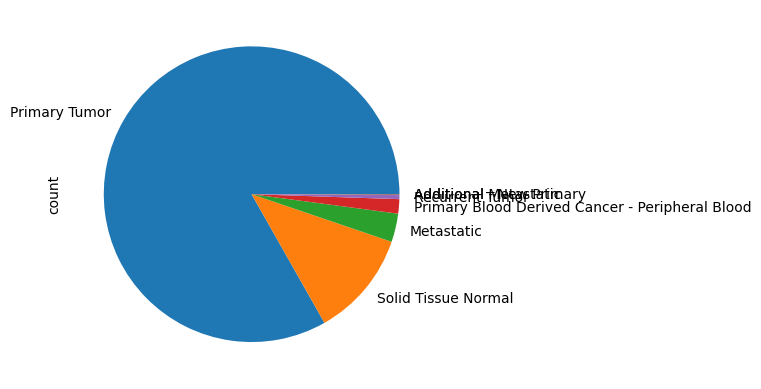

In [ ]:
sample_counts.plot(kind='pie')

In [ ]:
!pip install pyreadr
import pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 13.7 MB/s eta 0:00:00


In [ ]:
result = pyreadr.read_r('pan_cancer_dataset.RDS')
cancer = result[None]
cancer.head()

,gene,TCGA-S9-A7J2-01,TCGA-G3-A3CH-11,TCGA-EK-A2RE-01,TCGA-44-6778-01,TCGA-VM-A8C8-01,TCGA-AB-2863-03,TCGA-C8-A1HL-01,TCGA-EE-A17X-06,TCGA-YB-A89D-11,...,TCGA-DD-A4NR-01,TCGA-DJ-A2QC-01,TCGA-A8-A09K-01,TCGA-61-1907-01,TCGA-IB-7885-01,TCGA-95-7947-01,TCGA-VQ-AA6F-01,TCGA-55-6985-11,TCGA-DD-A115-01,TCGA-FV-A3I0-11
0,ARHGEF10L,10.9576,11.0186,9.7106,9.6205,11.6596,0.7316,9.2845,8.4529,10.2648,...,12.0972,9.0480,10.2686,8.9397,10.0416,10.0459,9.5758,9.6575,11.7589,11.5250
1,HIF3A,4.8099,5.3847,2.8888,7.9642,8.5622,1.2147,2.3590,3.9888,5.7145,...,3.0069,5.6910,2.6968,5.5271,5.7010,6.6572,5.8461,8.9521,3.7591,3.9462
2,RNF17,0.4657,0.0000,0.4192,1.5378,0.0000,0.0000,2.7396,0.0000,0.0000,...,6.8280,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4791,0.0000,0.0000
3,RNF10,11.2675,11.6690,11.4903,11.8432,11.2677,11.7164,12.4102,12.3562,11.6663,...,11.8776,11.9640,11.7363,11.7051,11.2921,11.3827,11.6292,11.6766,12.0914,11.8189
4,RNF11,10.1761,11.3980,11.7371,11.0531,11.3549,10.4861,11.1902,9.7486,10.8571,...,10.0321,11.2763,10.6688,11.7347,10.9219,10.9459,10.6314,11.3748,11.5774,11.2605


In [ ]:
proteoma = pd.read_csv('proteomics.tsv', sep='\t')
proteoma.head()

,Sample,TCGA-27-1833-01,TCGA-A5-A0GI-01,TCGA-BP-4165-01,TCGA-EY-A1GF-01,TCGA-CZ-4863-01,TCGA-CJ-4876-01,TCGA-CV-7247-01,TCGA-AR-A1AH-01,TCGA-44-6778-01,...,TCGA-A1-A0SO-01,TCGA-95-7947-01,TCGA-04-1638-01,TCGA-78-7145-01,TCGA-CF-A3MF-01,TCGA-CN-4728-01,TCGA-B5-A0JZ-01,TCGA-CV-7091-01,TCGA-FI-A2EY-01,TCGA-DY-A1DD-01
0,1433EPSILON,0.354159,0.250009,0.222598,-0.048706,0.152346,0.130359,0.146816,-0.229880,-0.415419,...,-0.079641,-0.457931,0.380300,-0.260066,-0.124329,-0.035999,0.078950,-0.199311,0.120568,-0.149828
1,4EBP1,-0.765668,-0.374590,-0.380307,0.108869,0.084013,-0.540564,-0.145804,0.560972,-0.372227,...,0.088545,-1.338594,0.067557,0.406431,-0.023459,0.154903,-0.481774,0.951466,-0.946360,0.445098
2,4EBP1PS65,-0.200527,0.195072,0.264028,-0.195315,0.502963,0.346999,0.015066,0.009782,-0.101263,...,-0.100215,-0.285230,0.045696,0.053814,-0.315440,-0.530181,0.022419,0.003105,-0.172938,-0.190552
3,4EBP1PT37T46,0.536203,-0.298304,-0.543908,-0.462706,-0.188861,-0.607042,-0.267698,0.450594,0.042768,...,0.329370,0.303510,-0.545776,0.045599,-0.220764,-1.667369,-0.742721,0.160255,-0.636034,-0.022921
4,53BP1,-0.831080,1.006317,-1.920805,0.706779,-0.364346,0.225038,-1.105122,-0.110469,-0.309165,...,-0.079728,-0.489790,0.390874,-0.031923,0.314990,-0.798627,1.002955,-1.217582,0.241778,-0.034982


## Evaluation of clustering

## Amplicon sequencing ( 7 min)



### Data table (16s.biom)


To work with BIOM file data in Python, we need to install the biom-format package, which provides tools to read, write, and manipulate BIOM tables commonly used in microbiome research. You can install it using:

In [ ]:
#!pip install biom-format
#from biom import load_table, Table # represents the BIOM data structure, allowing manipulation and analysis biom format in python.
#from biom.util import biom_open #  Used for safely reading and writing BIOM files

We are going to filter only the Latin American samples from the (16s.biom) file. To do this, we first need to load the sample IDs from the metadata file.

In [ ]:
!ls $HOME


amplicon		    latam_samples.tsv			README.md
assembly		    latam_samples_with_tree_ids.gsheet	sample.tsv
latam_samples_taxonomy.tsv  masspec				shotgun


In [ ]:
!ls /$HOME/amplicon/

16s.biom  16s.fa  16s.nwk  16s.tax  latam_16s.biom  latam_16s.tax  subset


In [ ]:
latam_data = os.path.join(HOME, "latam_samples.tsv")
# Read the CSV using the correct path
latam_data = pd.read_csv(latam_data, sep='\t', index_col=0)
latam_data.head()

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.jensen.43.s012,Jensen43.MX12.189,sediment,07/02/2012,Mexico,15.0,Jensen43.sediment.11,0.0,Jensen,43,Jensen43,...,marine subtidal rocky reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-189,not applicable,21.02361,-86.77158,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s013,Jensen43.MX12.213,sediment,07/04/2012,Mexico,15.0,Jensen43.sediment.12,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-213,not applicable,20.33194,-87.02712,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s014,Jensen43.MX12.236,sediment,07/05/2010,Mexico,15.0,Jensen43.sediment.14,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-236,not applicable,18.75917,-87.34052,Jensen sediments from global ocean,marine sediment metagenome
13114.pinto.62.s001,Pinto62.excavatedsoil.1,soil,5/21/16 0:00,Costa Rica,0.0,Soil excavated by the ants,1172.0,Pinto,62,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,excavated soil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome
13114.pinto.62.s002,Pinto62.undisturbedsoil.1,soil,5/21/16 0:00,Costa Rica,0.0,Soil not associated with the ant nest,1172.0,Pinto,62,Pinto62,...,insecta-associated habitat,soil,soil,Costa Rica,undisturbedsoil.1,Atta cephalotes,10.42936,-84.00939,"Pinto insects from Costa Rica: bees, leaf-cutt...",soil metagenome


In [ ]:
import pandas as pd
import os
from biom import load_table # Import the load_table function

latam_16s_filepath = os.path.join(HOME, "amplicon/latam_16s.biom")

# Use biom.load_table to read the BIOM file
latam_table = load_table(latam_16s_filepath)

# The variable `table_phylum_latam` used later in the notebook is likely intended
# to be derived from this loaded table. Ensure the variable names match
# the subsequent code.
table = latam_table

# You can optionally print the table object or its head to verify it loaded correctly
print(table)

As shown, the dimensionality of this table is 427269 x 67 (you can also get this by 'table.shape'). This means 67 samples and 427269 observations (a.k.a., features)

Not all sample IDs in the metadata (_n_ = 92) are found in this data table (_n_ = 67). This difference can be attributed to sample loss, insufficient biological materials, inadequate sequencing yield or quality, etc. This is common and one should be cautious about it, especially during multi-omic integration.

The observation IDs are units of microbial components in the community. As discussed above, each observation represents an ASV.

In [ ]:
latam_table.ids('observation')[:10]

array(['08665176', '13062664', '03483654', '21781706', '07176695',
       '18439252', '08434208', '07654326', '22343722', '13688331'],
      dtype='<U8')

In data science, a more generic term "[**feature**](https://en.wikipedia.org/wiki/Feature_(machine_learning)" is typically used to describe all independent variables, regardless of OTUs, ASVs, genes, metabolites, etc. A data table of samples by features like this one is usually referred to as a **feature table**.

### Sparse data

A BIOM table can be converted into a Pandas dataframe. This allows one to take a quick look at the table content. What did you see?

In [ ]:
latam_df = latam_table.to_dataframe()
latam_df.head()

,13114.rohwer.86.s003,13114.zaneveld.9.s012,13114.jensen.43.s014,13114.schmidt.56.s022,13114.stewart.26.s006,13114.pinto.63.s017,13114.pinto.63.s009,13114.schmidt.56.s026,13114.schmidt.56.s023,13114.pinto.63.s019,...,13114.stewart.26.s007,13114.schmidt.56.s018,13114.stewart.26.s004,13114.pinto.63.s028,13114.pinto.63.s024,13114.schmidt.56.s019,13114.schmidt.56.s016,13114.pinto.63.s022,13114.pinto.63.s002,13114.pinto.63.s025
08665176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13062664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03483654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21781706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07176695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most cell values are zeros. This means that while there are more than 400k ASVs discovered across the sample collection, each sample only contains a very small subset of them. This indicates an important statistical property of biological omic data that is distinct from many other fields: [**sparsity**](https://en.wikipedia.org/wiki/Sparse_matrix).

One can let scikit-bio report the density (i.e., fraction of non-zero values) of the table:

In [ ]:
latam_table.get_table_density()


0.002042825060782604

That is, only 0.20% of the cell values are non-zero.

In [ ]:
sums = latam_table.sum(axis='sample')
sums[:10]

array([6.2283e+04, 1.4290e+03, 4.1128e+04, 2.4375e+04, 1.9280e+04,
       5.6452e+04, 4.4089e+04, 2.4840e+04, 1.4000e+01, 7.3780e+04])

To efficiently store sparse data, one would avoid storing numerous zeros, but instead only store non-zero cell values and their coordinates. This is referred to as the [sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix). This is the underlying data structure of BIOM, as in contrast to the dense matrix as used in e.g. NumPy.

If needed, you can convert the BIOM table into a 2D NumPy array (a dense matrix). To avoid stressing the computer (because the data table is huge!), the following code only converts the first 5 rows and columns of the table.

In [ ]:
latam_table.head().matrix_data.toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Taxonomy

As shown above, there are over 400k features (ASVs) but merely 76 samples in the 16S rRNA amplicon Latam data table. Such a large number of features (referred to as [**high-dimensionality**](https://en.wikipedia.org/wiki/High-dimensional_statistics) in data science) imposes significant challenges to the subsequent analysis (you may read about the "[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)" and intepretation. While there are pure mathematical approaches to mitigate high-dimensionality, biological sciences provide unique, knowledge-based solutions to it.

These features are not a plain list of entities. They are (presumably) microorganisms, and organisms can be classified. The classification of organisms, a.k.a., [**taxonomy**](https://en.wikipedia.org/wiki/Taxonomy), provides a hierarchical system with (usually) some 7-8 fixed ranks to describe the relationships among organisms.

The taxonomic assignments of the ASVs according to the GG2 reference is provided in the file `16s.tax`. It reads like:

00006499	d__Archaea; p__Thermoproteota; c__Nitrososphaeria_A; o__Nitrososphaerales; f__Nitrosopumilaceae; g__Nitrosopelagicus; s__Nitrosopelagicus sp000402075

00012890	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__EnvOPS12; g__UBA8950; s__UBA8950 sp001872455

00012904	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__; g__; s__

00024522	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__

00024634	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__

00024664	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555

00024725	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555

00024797	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA10102; g__; s__

00025031	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__

00025034	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__


It is a mapping of ASV IDs to taxonomic **lineage** strings. Each lineage string consists of [seven ranks](https://en.wikipedia.org/wiki/Taxonomic_rank), as indicated by their initials. The seven ranks are (from high to low):

### Filtering the data 16s.tax

Check the path of our data filtered latam_16s.biom and 16s.tax



In [ ]:
!head $HOME/amplicon/16s.tax

00006499	d__Archaea; p__Thermoproteota; c__Nitrososphaeria_A; o__Nitrososphaerales; f__Nitrosopumilaceae; g__Nitrosopelagicus; s__Nitrosopelagicus sp000402075
00012890	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__EnvOPS12; g__UBA8950; s__UBA8950 sp001872455
00012904	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__; g__; s__
00024522	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__
00024634	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__
00024664	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555
00024725	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555
00024797	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA10102; g__; s__
00025031	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__

In [ ]:
filtered_taxonomy_file = f'{HOME}/amplicon/latam_16s.tax'
filtered_taxonomy_file

'/content/drive/MyDrive/emp500/amplicon/latam_16s.tax'

In [ ]:
!head $HOME/amplicon/latam_16s.tax

00006499	d__Archaea; p__Thermoproteota; c__Nitrososphaeria_A; o__Nitrososphaerales; f__Nitrosopumilaceae; g__Nitrosopelagicus; s__Nitrosopelagicus sp000402075
00012890	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__EnvOPS12; g__UBA8950; s__UBA8950 sp001872455
00012904	d__Bacteria; p__Chloroflexota; c__Anaerolineae; o__Anaerolineales; f__; g__; s__
00024522	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__
00024634	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__; g__; s__
00024664	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555
00024725	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA5738; g__UBA5738; s__UBA5738 sp002423555
00024797	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__UBA10102; g__; s__
00025031	d__Bacteria; p__Patescibacteria; c__Paceibacteria; o__Paceibacterales; f__

In [ ]:
ranks = ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

The following code can read lineage strings into a Pandas dataframe with columns representing individual ranks.

In [ ]:
taxonomy_latam = {}
with open(f'{HOME}/amplicon/latam_16s.tax', 'r') as f:
    for line in f:
        id_, lineage = line.rstrip().split('\t')
        ranked = [x.split('__')[1] if '__' in x else '' for x in lineage.split('; ')]
        taxonomy_latam[id_] = ranked

# Convert to DataFrame
taxonomy_latam = pd.DataFrame.from_dict(taxonomy_latam, orient='index', columns=ranks).replace('', np.nan)
taxonomy_latam.head()

,Domain,Phylum,Class,Order,Family,Genus,Species
00006499,Archaea,Thermoproteota,Nitrososphaeria_A,Nitrososphaerales,Nitrosopumilaceae,Nitrosopelagicus,Nitrosopelagicus sp000402075
00012890,Bacteria,Chloroflexota,Anaerolineae,Anaerolineales,EnvOPS12,UBA8950,UBA8950 sp001872455
00012904,Bacteria,Chloroflexota,Anaerolineae,Anaerolineales,NaN,NaN,NaN
00024522,Bacteria,Patescibacteria,Paceibacteria,Paceibacterales,NaN,NaN,NaN
00024634,Bacteria,Patescibacteria,Paceibacteria,Paceibacterales,NaN,NaN,NaN


Given the taxonomy, one can collapse the data table to a specific taxonomic rank. The collapsing process will aggregate (sum) cell values that belong to the same taxonomic group. This not only facilitates biologically meaningful description of community composition, but also serves as a knowledge-guided method of dimensionality reduction. The following example converts the features into the phylum level.

In [ ]:
table_phylum_latam = table.collapse(taxonomy_latam['Phylum'].to_dict(), norm=False, axis='observation')
table_phylum_latam

124 x 67 <class 'biom.table.Table'> with 1659 nonzero entries (19% dense)

After collapsing, the data table becomes:

In [ ]:
table_phylum_latam.to_dataframe().head()

,13114.rohwer.86.s003,13114.zaneveld.9.s012,13114.jensen.43.s014,13114.schmidt.56.s022,13114.stewart.26.s006,13114.pinto.63.s017,13114.pinto.63.s009,13114.schmidt.56.s026,13114.schmidt.56.s023,13114.pinto.63.s019,...,13114.stewart.26.s007,13114.schmidt.56.s018,13114.stewart.26.s004,13114.pinto.63.s028,13114.pinto.63.s024,13114.schmidt.56.s019,13114.schmidt.56.s016,13114.pinto.63.s022,13114.pinto.63.s002,13114.pinto.63.s025
Proteobacteria,13452.0,411.0,14881.0,5443.0,6095.0,24189.0,22866.0,5402.0,6.0,72671.0,...,18302.0,0,10084.0,3955.0,7754.0,0,3653.0,46180.0,2108.0,26091.0
Desulfobacterota_C,50.0,0,52.0,0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Planctomycetota,3195.0,70.0,5818.0,1147.0,167.0,22.0,0,887.0,0,0,...,211.0,0,71.0,0,80.0,0,447.0,0,515.0,730.0
Thermoplasmatota,3.0,0,0,0,3289.0,0,0,0,0,0,...,3437.0,0,2028.0,0,157.0,0,0,0,39.0,0
Gemmatimonadota,58.0,21.0,167.0,258.0,59.0,32.0,104.0,180.0,0,0,...,0,0,166.0,0,0,0,458.0,0,50.0,364.0


Note: If you work with a Pandas dataframe instead of a BIOM table, you can achieve this using the `groupby` function.

In [ ]:

# table.to_dataframe().groupby(taxonomy['Phylum']).sum()

It should be noted that 16S rRNA sequencing, particularly V4 region sequencing, can reach a taxonomic resolution as low as **genus**. Despite that the taxonomic assignment also contains species, it is usually considered less reliable to base the analysis on a species-level profile inferred from 16S rRNA data.

However, the emerging technique of **full-length rRNA operon sequencing** largely overcomes this limitation by targetting the entire 16S rRNA gene (about 1.5 kb) or even the entire rRNA operon (about 4.5 kb) with the [long-read sequencing technology](https://en.wikipedia.org/wiki/Third-generation_sequencing). The EMP500 study also generated full-length rRNA operon data, despite not included in this demo dataset. You may consider exploring it as a practice after the tutorial.

**Exercise 2** merges the phylum-level abundance table with metadata from Latin American samples, calculates the relative abundance of each phylum by sample type, selects the 10 most abundant phyla, and visualizes them in a stacked bar plot.

```
#  Load metadata
meta = pd.read_csv(f'{HOME}/latam_samples.tsv', sep='\t', index_col=0)

# Convert the phylum-level BIOM table to a DataFrame (samples as rows)
df_phylum = table_phylum_latam.to_dataframe().T
df_phylum.index.name = 'sample_id'

# Merge phylum data with metadata by sample ID
df_merged = df_phylum.join(meta, how='inner')

# Select only numeric columns (i.e., phylum abundance data)
phyla_columns = df_phylum.columns
df_numeric = df_merged[phyla_columns]

# Group by sample type and sum abundances
grouped = df_merged.groupby('empo_2')[phyla_columns].sum()

# Convert to relative abundances (proportions)
grouped_rel = grouped.div(grouped.sum(axis=1), axis=0)

# Select top 10 most abundant phyla globally
top_phyla = grouped_rel.sum().nlargest(10).index

# Filter to keep only those top 10 phyla
grouped_rel_top = grouped_rel[top_phyla]

# Create stacked bar plot
grouped_rel_top.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.ylabel('Relative Abundance')
plt.title('Top 10 Phyla per Sample Type in Latin America')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Phylum')
plt.tight_layout()
plt.show()
```





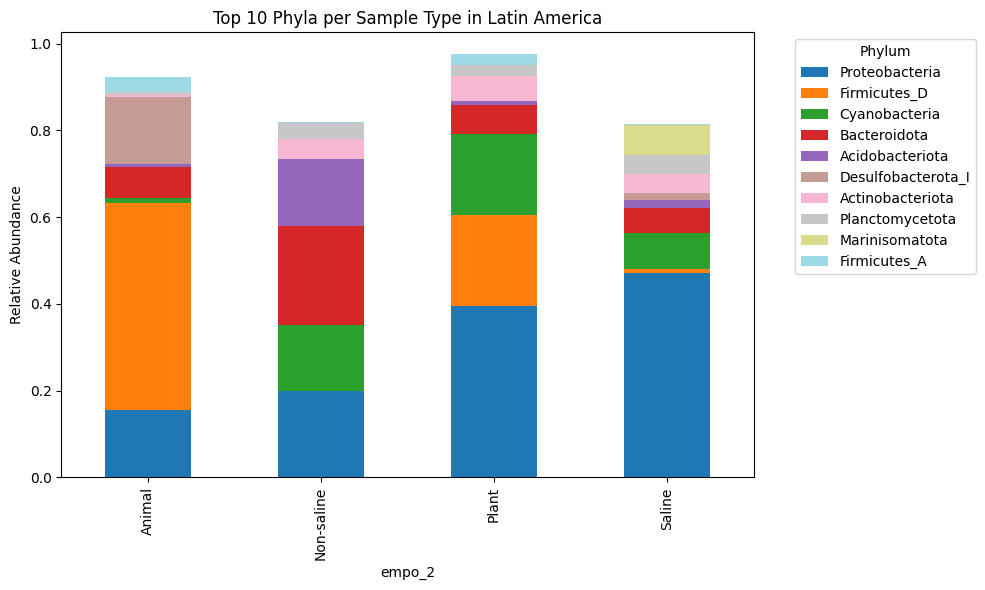

In [ ]:
# Load metadata
meta = pd.read_csv(f'{HOME}/latam_samples.tsv', sep='\t', index_col=0)

# Convert the phylum-level BIOM table to a DataFrame (samples as rows)
df_phylum = table_phylum_latam.to_dataframe().T
df_phylum.index.name = 'sample_id'

# Merge phylum data with metadata by sample ID
df_merged = df_phylum.join(meta, how='inner')

# Select only numeric columns (i.e., phylum abundance data)
phyla_columns = df_phylum.columns
df_numeric = df_merged[phyla_columns]

# Group by sample type and sum abundances
grouped = df_merged.groupby('empo_2')[phyla_columns].sum()

# Convert to relative abundances (proportions)
grouped_rel = grouped.div(grouped.sum(axis=1), axis=0)

# Select top 10 most abundant phyla globally
top_phyla = grouped_rel.sum().nlargest(10).index

# Filter to keep only those top 10 phyla
grouped_rel_top = grouped_rel[top_phyla]

# Create stacked bar plot
grouped_rel_top.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.ylabel('Relative Abundance')
plt.title('Top 10 Phyla per Sample Type in Latin America')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Phylum')
plt.tight_layout()
plt.show()

## Metabolomics